In [1]:
!pip install nibabel
!git clone https://www.github.com/MELDproject/meld_workshop
!pip install matplotlib-surface-plotting
!pip install ipywidgets
import matplotlib_surface_plotting as msp
import numpy as np
import os
import matplotlib.pyplot as plt
import nibabel as nb



fatal: destination path 'meld_workshop' already exists and is not an empty directory.


#Load in the T1 and FLAIR MRIs

In [2]:
t1 = nb.load('./meld_workshop/data/sub_01/mri/T1.mgz')
flair = nb.load('./meld_workshop/data/sub_01/mri/FLAIR.mgz')
t1_data=t1.get_fdata()
flair_data=flair.get_fdata()

In [3]:
from ipywidgets import interact, IntSlider
def plot_slice(slice_index):
    fig, axes = plt.subplots(1, 2, figsize=(20, 8))

    axes[0].imshow(t1_data[:, :, slice_index].T, cmap='gray',vmin=50,vmax=120)
    axes[0].set_title(f'T1 - Slice {slice_index}')
    axes[0].axis('off')

    axes[1].imshow(flair_data[:, :, slice_index].T, cmap='gray',vmin=20,vmax=180)
    axes[1].set_title(f'FLAIR - Slice {slice_index}')
    axes[1].axis('off')

    plt.show()

# Create an interactive slider
slice_slider = IntSlider(min=0, max=t1_data.shape[2]-1, step=1, value=t1_data.shape[2]//2)

# Use the interact function to update the plot with the slider
interact(plot_slice, slice_index=slice_slider)

interactive(children=(IntSlider(value=128, description='slice_index', max=255), Output()), _dom_classes=('widg…

<function __main__.plot_slice(slice_index)>

How confident are you about the lesion location?



In [4]:
#load and view surface based features

In [5]:
features = ['thickness','w-g.pct','gm_FLAIR_0.5']

In [6]:
surf = nb.freesurfer.read_geometry('./meld_workshop/data/fsaverage_sym/surf/lh.inflated')

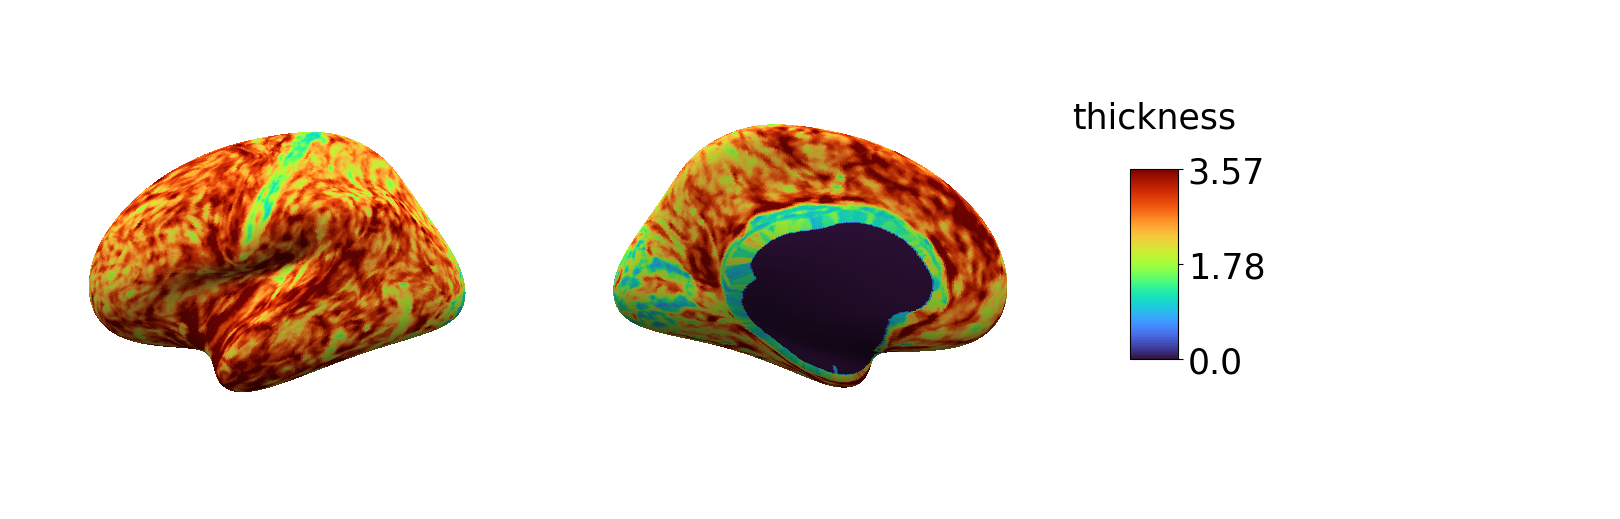

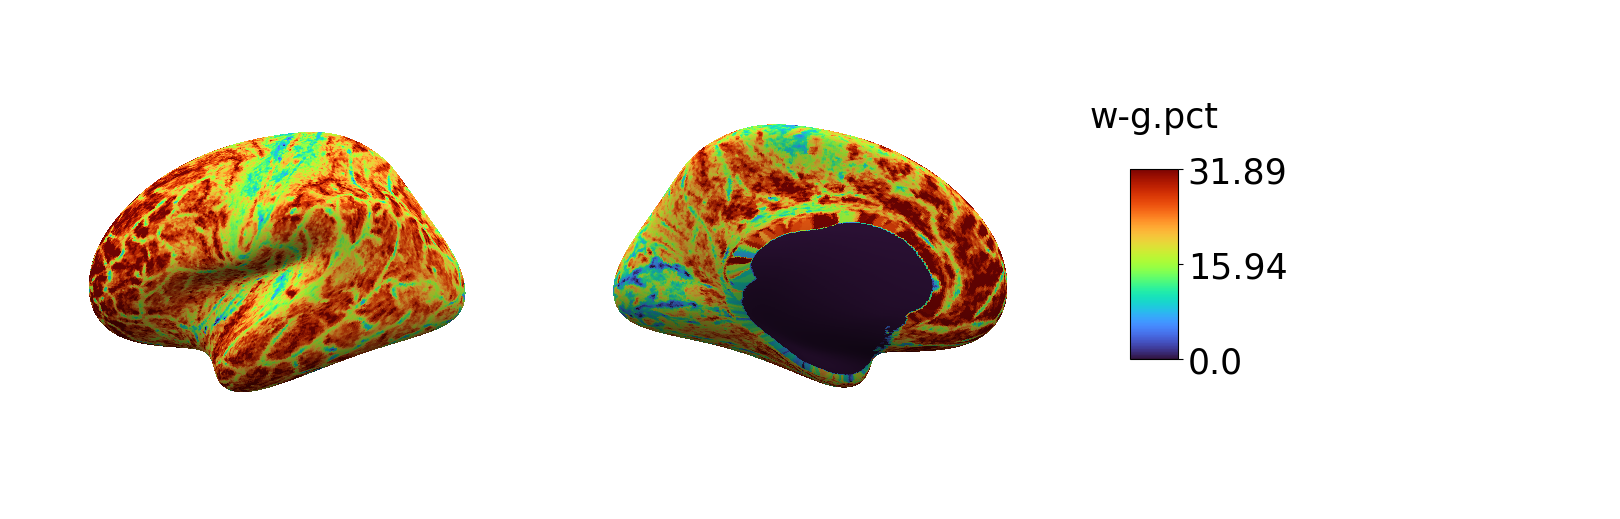

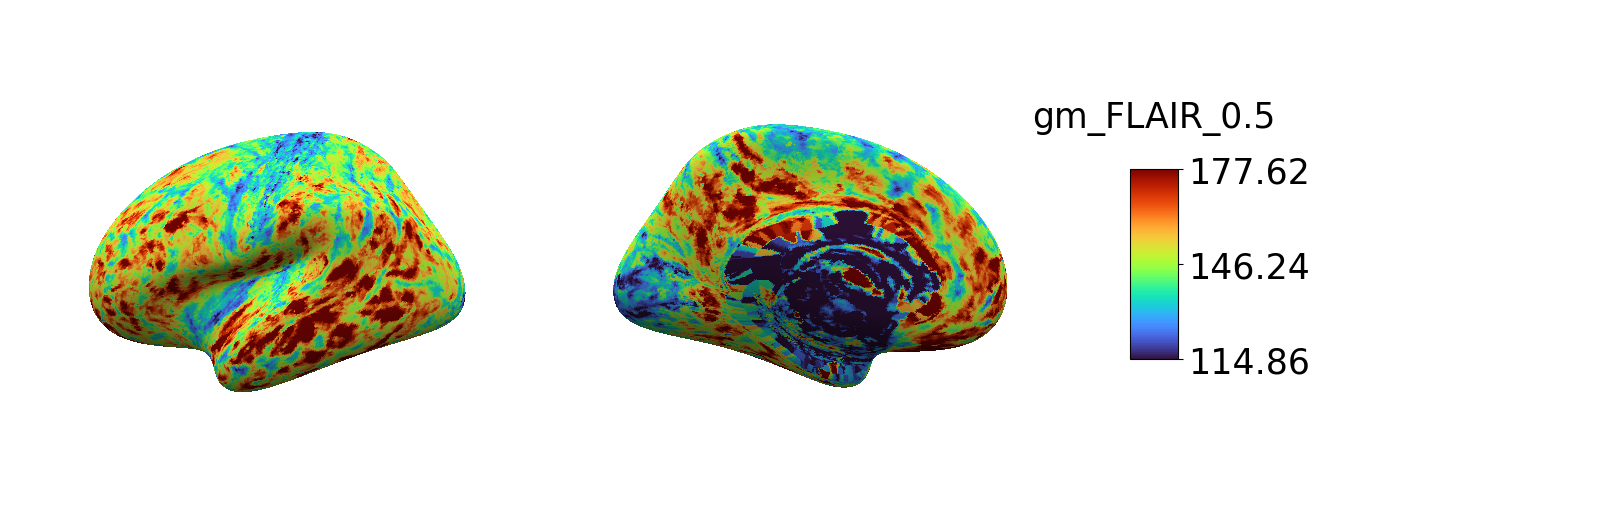

In [7]:
surf_folder = './meld_workshop/data/sub_01/xhemi/surf_meld'
hemi='rh'
for feat_i in features:
  feat = '{}.on_lh.{}.mgh'.format(hemi,feat_i)
  feature = nb.load(os.path.join(surf_folder,
                    feat)).get_fdata().ravel()

  msp.plot_surf(surf[0],surf[1],
                feature,vmin=np.percentile(feature,5),cmap_label=feat_i,
                vmax = np.percentile(feature,95),cmap='turbo')

2. How confident are you about the lesion location?




#inter & intrasubject normalisation

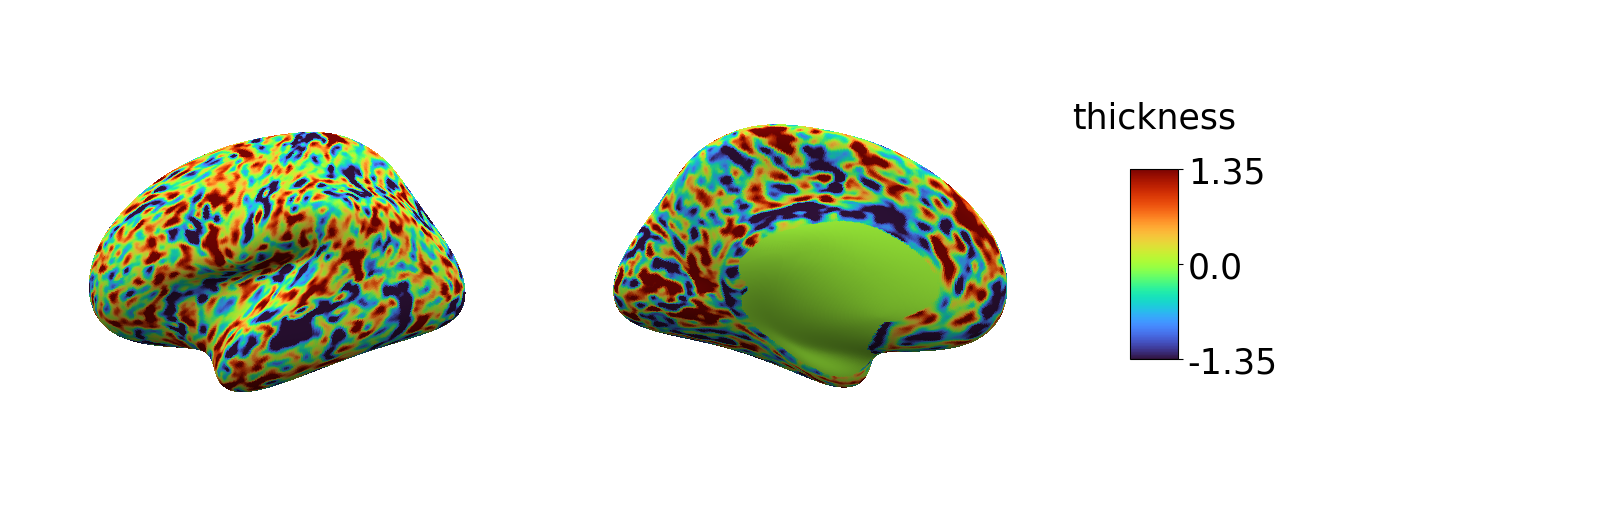

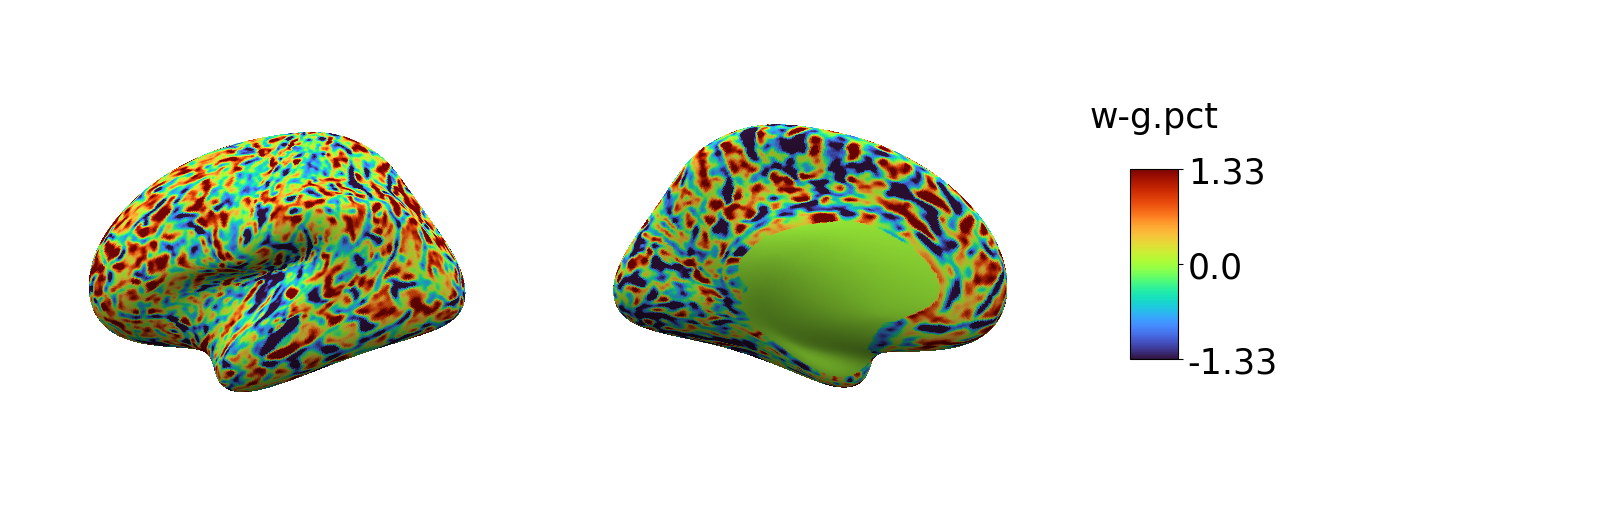

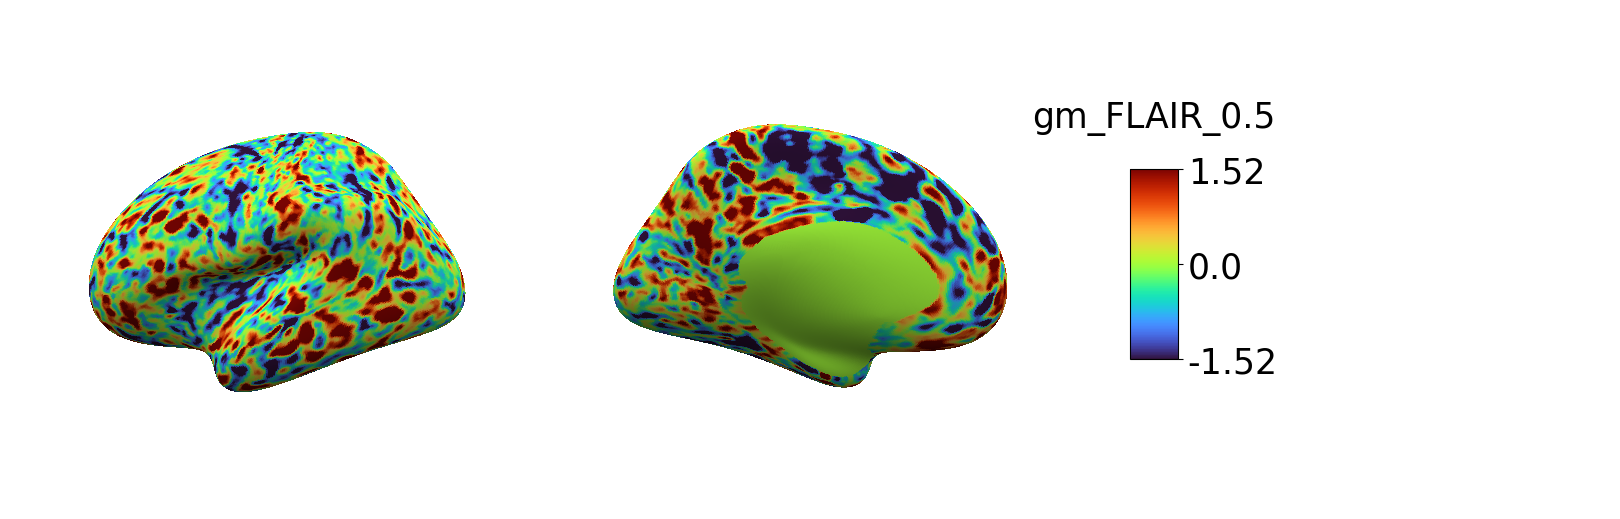

In [8]:
for feat_i in features:
  feat = '{}.inter_z.intra_z.combat.on_lh.{}.sm3.mgh'.format(hemi,feat_i)
  feature = nb.load(os.path.join(surf_folder,
                    feat)).get_fdata().ravel()

  msp.plot_surf(surf[0],surf[1],
                feature,vmin=-np.percentile(feature,95),cmap_label=feat_i,
                vmax = np.percentile(feature,95),cmap='turbo')

3. How confident are you about the lesion location?


In [9]:
#Normalised features input into graph neural network algorithm.
#Produces predictions on surface

In [12]:
feature = nb.load(os.path.join(surf_folder,
                    f'{hemi}.on_lh.prediction.mgh')).get_fdata().ravel()

In [13]:
feature.sum()

0.0